# **Import Libraries**

In [354]:
import pandas as pd
import nltk

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [355]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/twitter_validation.csv',names=['id','source','target','text'])
df

,id,source,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


Check missing values

In [356]:
df.isna().sum()

id        0
source    0
target    0
text      0
dtype: int64

In [357]:
df['target'].value_counts()

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

# **Visualization**

<Axes: xlabel='target', ylabel='count'>

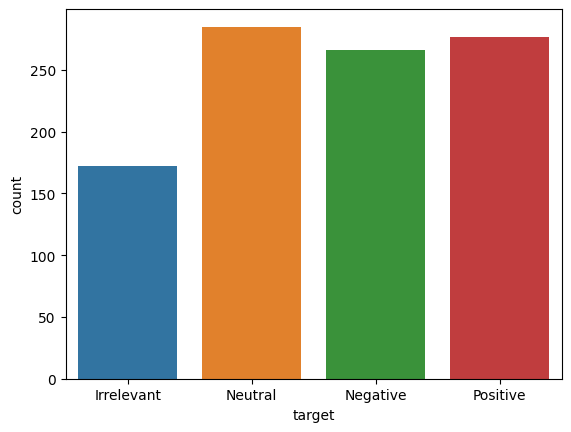

In [358]:
sns.countplot(data=df,x='target',hue='target')

# **Data Preprocessing**

Drop unwanted columns

In [360]:
df.drop(['id','source'],axis=1,inplace=True)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


Filtering relevent data

In [361]:
df1=df.loc[df['target']!='Irrelevant']
df1

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


Resetting Index

In [362]:
df1.reset_index(drop=True,inplace=True)
df1

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


Mapping sentiments to numeric values

In [363]:
df1['target']=df1['target'].map({'Neutral':0,'Negative':-1,'Positive':1})
df1

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


# **Text Preprocessing**

In [364]:
text=df1.text
text

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

### **Remove Special Characters**

In [365]:
text=text.str.replace('[^a-zA-Z0-9]+'," ")
text

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

## **Tokenization and Stemming**

In [366]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [367]:
text=text.apply(lambda line:[stemmer.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token:" ".join(token))
text

0      bbc news - amazon boss jeff bezo reject claim ...
1      @microsoft whi do i pay for word when it funct...
2      csgo matchmak is so full of closet hack , it a...
3      now the presid is slap american in the face th...
4      hi @eahelp i ’ ve had madelein mccann in my ce...
                             ...                        
823    pleas explain how this is possibl ! how can th...
824    good on soni . as much as i want to see the ne...
825    today suck so it ’ s time to drink wine n play...
826    bought a fraction of microsoft today . small w...
827    johnson & johnson to stop sell talc babi powde...
Name: text, Length: 828, dtype: object

## **Stopwords Removal**

In [368]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [369]:
text=text.apply(lambda line:[token for token in tk.tokenize(line) if token not in sw]).apply(lambda token:" ".join(token))
text

0      bbc news - amazon boss jeff bezo reject claim ...
1      @microsoft whi pay word function poor @samsung...
2       csgo matchmak full closet hack , truli aw game .
3      presid slap american face realli commit unlaw ...
4      hi @eahelp ’ madelein mccann cellar past 13 ye...
                             ...                        
823    pleas explain possibl ! let compani overcharg ...
824    good soni . much want see new ps5 , go right m...
825    today suck ’ time drink wine n play borderland...
826        bought fraction microsoft today . small win .
827    johnson & johnson stop sell talc babi powder u...
Name: text, Length: 828, dtype: object

## **Vectorization**

In [370]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(text)
print(X)

  (0, 644)	0.24371149439523576
  (0, 422)	0.24371149439523576
  (0, 3598)	0.21193288837057733
  (0, 793)	0.11710011882947315
  (0, 975)	0.24371149439523576
  (0, 1107)	0.22964923721081565
  (0, 2030)	0.124059738467601
  (0, 233)	0.21193288837057733
  (0, 823)	0.16216158309067538
  (0, 766)	0.20026342771374978
  (0, 2856)	0.24371149439523576
  (0, 516)	0.24371149439523576
  (0, 1860)	0.22964923721081565
  (0, 584)	0.21193288837057733
  (0, 306)	0.1415930695027434
  (0, 2340)	0.3691755458992268
  (0, 484)	0.4592984744216313
  (1, 756)	0.4055823664694651
  (1, 2995)	0.4055823664694651
  (1, 2637)	0.3821800909185634
  (1, 1398)	0.4055823664694651
  (1, 3820)	0.36557591217188057
  (1, 2534)	0.3126902562590763
  (1, 3779)	0.26216072802580975
  (1, 2195)	0.24555654927912696
  :	:
  (825, 3512)	0.2560582225152134
  (825, 581)	0.22981061112100945
  (825, 968)	0.2315686698425631
  (825, 3501)	0.21750175079084832
  (825, 3343)	0.2904718522758868
  (825, 2600)	0.17148706662740873
  (826, 1372)	0.5

In [371]:
X.shape

(828, 3937)

In [372]:
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [373]:
df=pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.248102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
824,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [374]:
y=df1['target']
y

0      0
1     -1
2     -1
3      0
4     -1
      ..
823   -1
824    1
825    1
826    1
827    0
Name: target, Length: 828, dtype: int64

## **Train Test Split**

In [375]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# **Model building**

In [376]:
knn=KNeighborsClassifier(n_neighbors=15)
nb=BernoulliNB()
sv=SVC()
rf=RandomForestClassifier(criterion='entropy',random_state=5,max_depth=10)
models=[knn,nb,sv,rf]
for model in models:
  print("_"*50,model,"_"*50)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

__________________________________________________ KNeighborsClassifier(n_neighbors=15) __________________________________________________
              precision    recall  f1-score   support

          -1       0.46      0.78      0.58        74
           0       0.64      0.42      0.51        91
           1       0.60      0.46      0.52        84

    accuracy                           0.54       249
   macro avg       0.57      0.56      0.54       249
weighted avg       0.58      0.54      0.54       249

__________________________________________________ BernoulliNB() __________________________________________________
              precision    recall  f1-score   support

          -1       0.51      0.78      0.62        74
           0       0.78      0.35      0.48        91
           1       0.51      0.57      0.54        84

    accuracy                           0.55       249
   macro avg       0.60      0.57      0.55       249
weighted avg       0.61      0.55     

By comparing all classifiers ,SVM has the highest accuracy

### **Predict with new Text**

In [377]:
nw=vectorizer.transform(['bought a fraction of microsoft today'])
nw=nw.toarray()
y=sv.predict(nw)
if y==0:
  print('Neutral')
elif y==-1:
  print('Negative')
else:
  print('positive')


positive
